# Time Series - Set 1

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
data_path='datasets/glucose.csv'
file_tag ='set_1'

In [74]:
data=pd.read_csv(data_path)

In [75]:
data.head()

,Date,Insulin,Glucose
0,01-03-1991 08:00,7.0,281
1,01-03-1991 12:00,NaN,209
2,01-03-1991 18:00,10.0,116
3,01-03-1991 22:00,NaN,321
4,02-03-1991 08:00,7.0,304


In [76]:
data.shape # two variables (excluding time) means data set 1 is multivariate

(596, 3)

In [77]:
data.Date # Most Atomic is 4 to 4 hours

0      01-03-1991 08:00
1      01-03-1991 12:00
2      01-03-1991 18:00
3      01-03-1991 22:00
4      02-03-1991 08:00
             ...       
591    26-07-1991 22:00
592    27-07-1991 08:00
593    27-07-1991 12:00
594    27-07-1991 18:00
595    27-07-1991 22:00
Name: Date, Length: 596, dtype: object

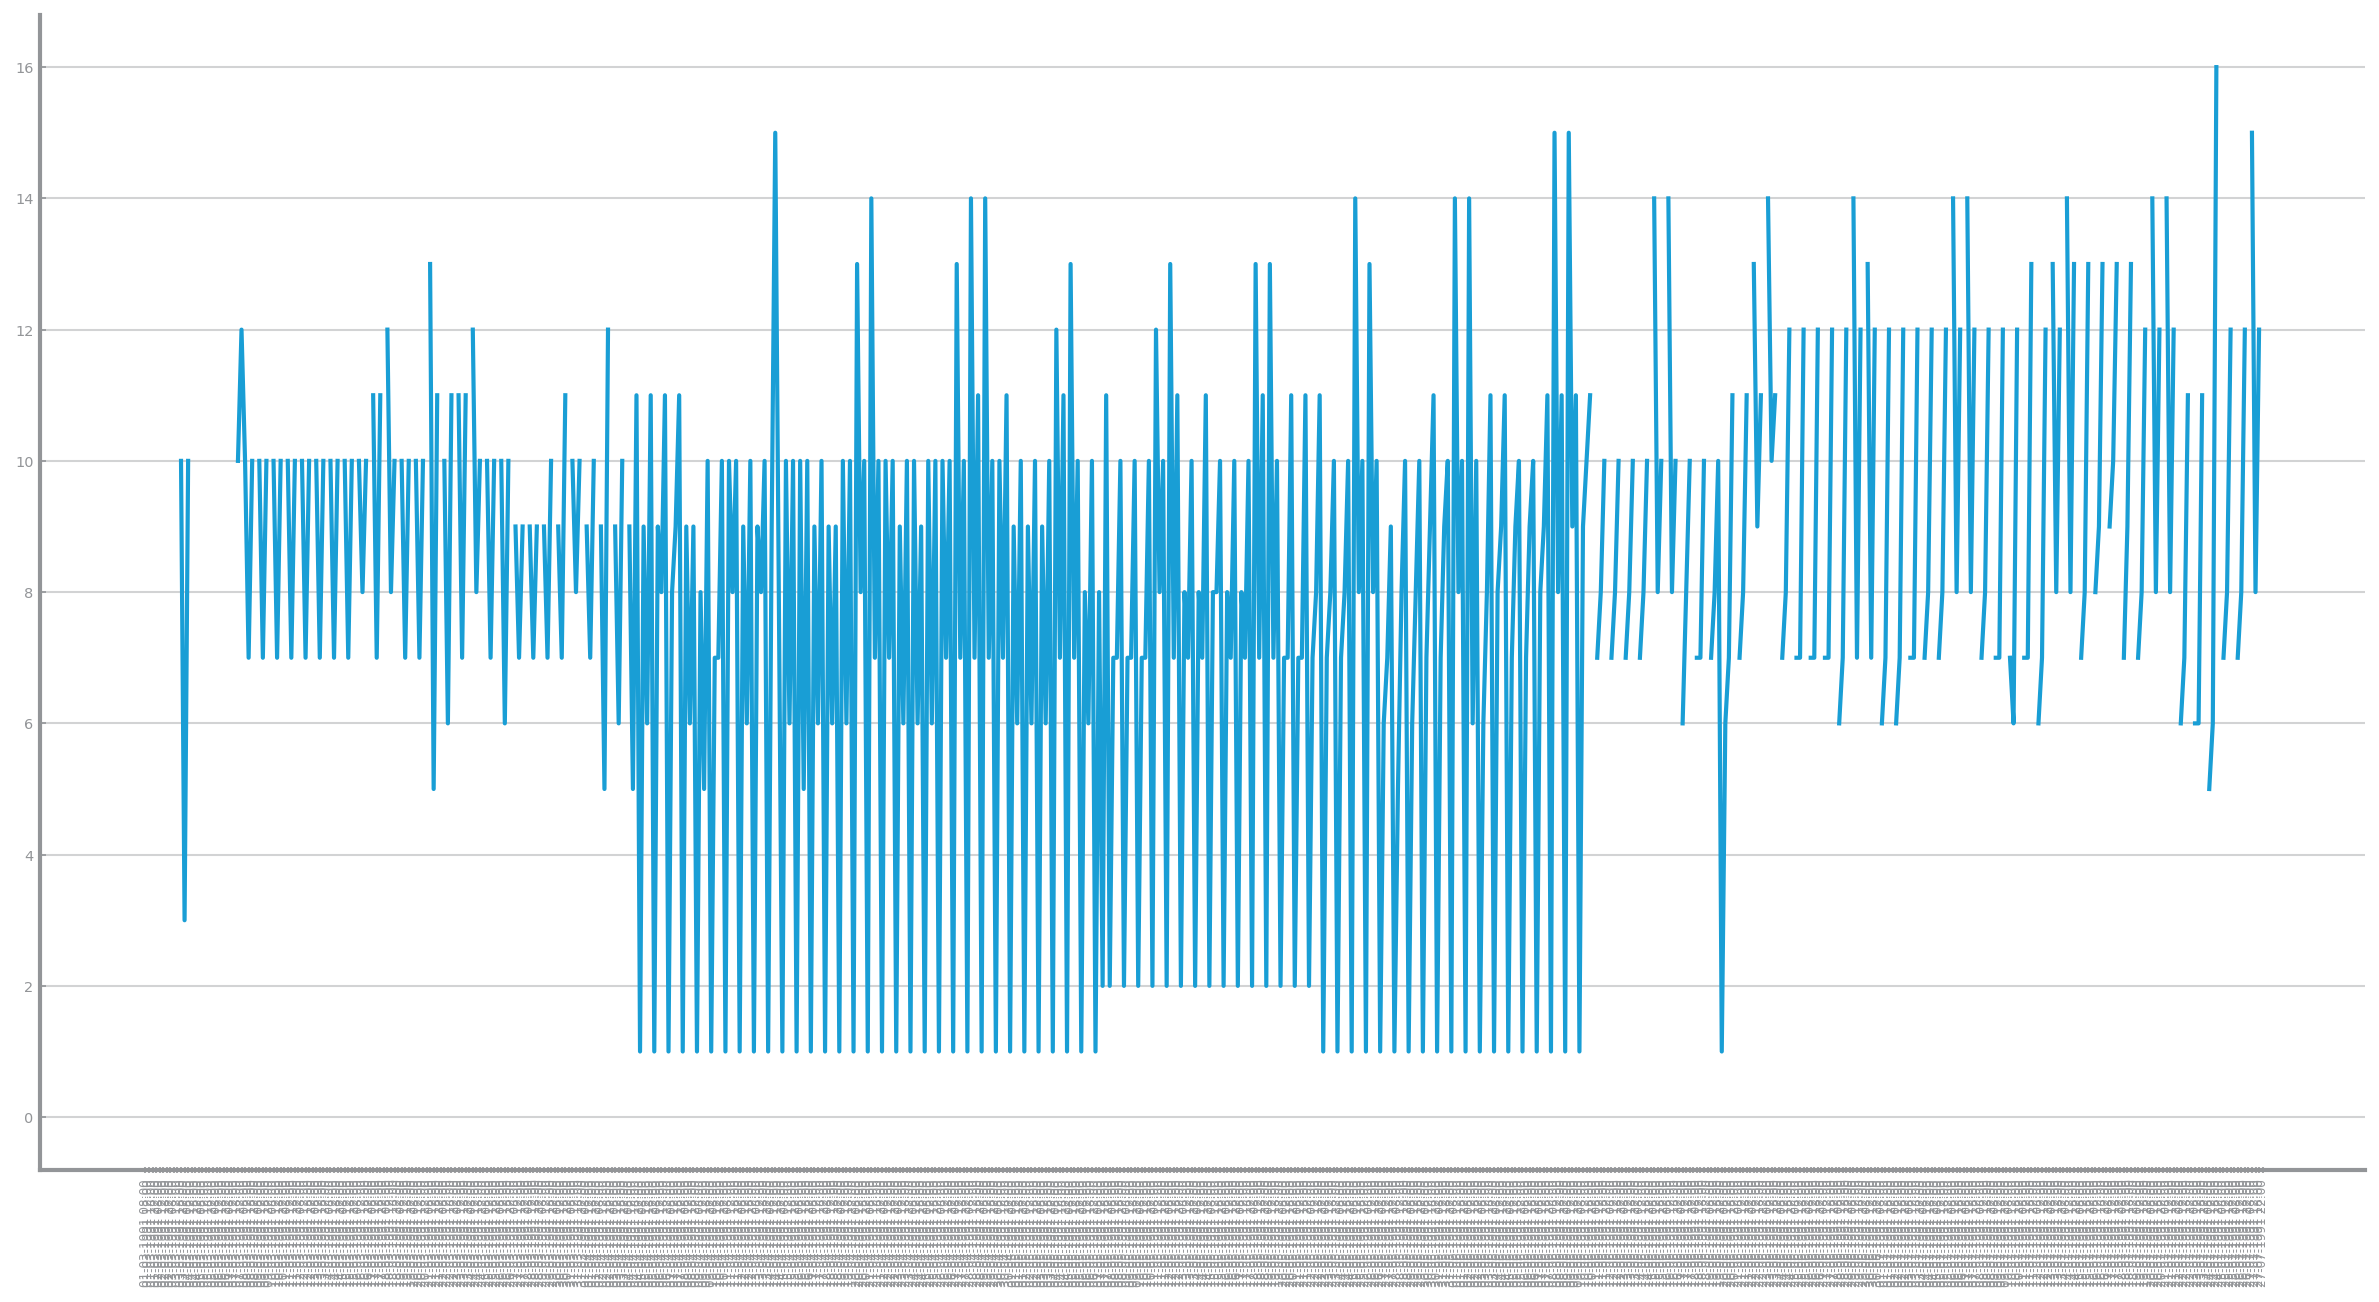

In [78]:
fig = plt.figure(figsize=(20, 10))
plt.plot(data.Date, data.Insulin)

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

## CODE FROM CLASS

In [79]:
from pandas import read_csv
from matplotlib.pyplot import figure, xticks, show
from ts_functions import plot_series, HEIGHT

data = read_csv(data_path, index_col='Date', sep=',', decimal='.', parse_dates=False, infer_datetime_format=True)
data.index = pd.to_datetime(data.index, format="%d-%m-%Y %H:%M")

In [10]:
data.index

DatetimeIndex(['1991-03-01 08:00:00', '1991-03-01 12:00:00',
               '1991-03-01 18:00:00', '1991-03-01 22:00:00',
               '1991-03-02 08:00:00', '1991-03-02 12:00:00',
               '1991-03-02 18:00:00', '1991-03-02 22:00:00',
               '1991-03-03 08:00:00', '1991-03-03 12:00:00',
               ...
               '1991-07-25 18:00:00', '1991-07-25 22:00:00',
               '1991-07-26 08:00:00', '1991-07-26 12:00:00',
               '1991-07-26 18:00:00', '1991-07-26 22:00:00',
               '1991-07-27 08:00:00', '1991-07-27 12:00:00',
               '1991-07-27 18:00:00', '1991-07-27 22:00:00'],
              dtype='datetime64[ns]', name='Date', length=596, freq=None)

Nr. Records =  596
First timestamp 1991-03-01 08:00:00
Last timestamp 1991-07-27 22:00:00


(array([726892., 726923., 726953., 726984., 727014., 727045.]),
 [Text(726892.0, 0, '1991-03-01'),
  Text(726923.0, 0, '1991-04-01'),
  Text(726953.0, 0, '1991-05-01'),
  Text(726984.0, 0, '1991-06-01'),
  Text(727014.0, 0, '1991-07-01'),
  Text(727045.0, 0, '1991-08-01')])

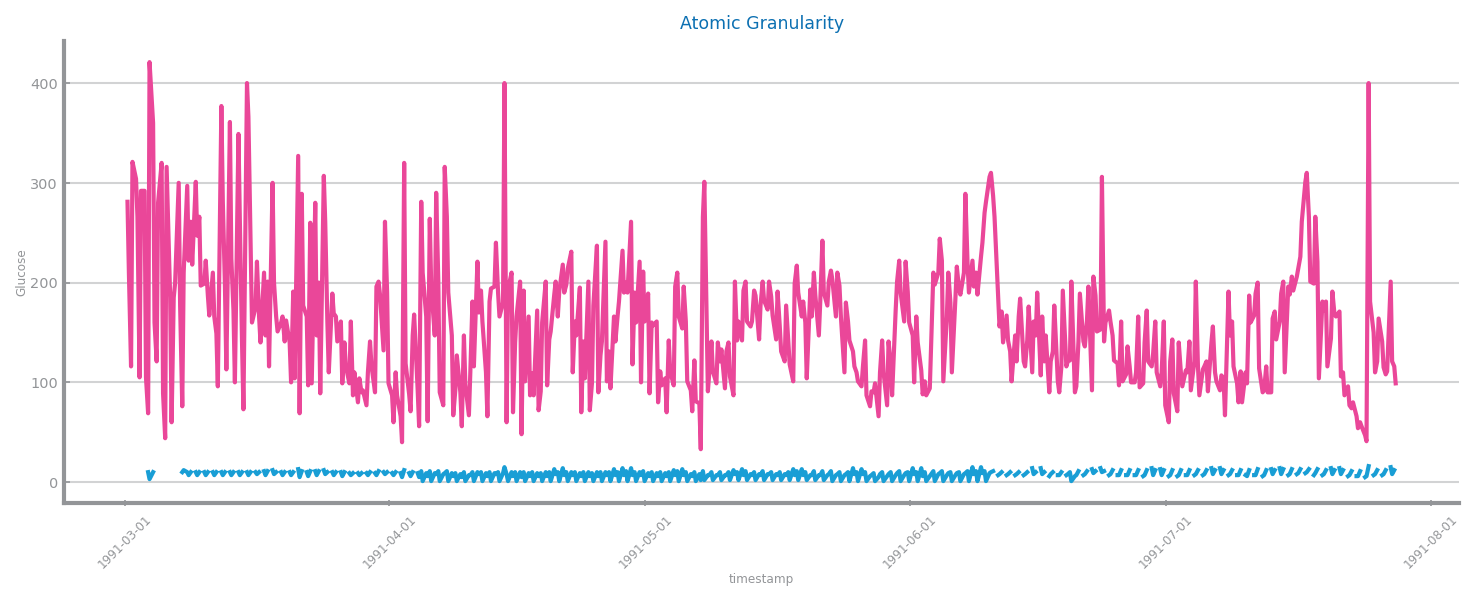

In [11]:
print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(data, x_label='timestamp', y_label='Glucose', title='Atomic Granularity')
xticks(rotation = 45)

#plt.savefig('images/set_1_granularity_atomic.png')

(array([726892., 726923., 726953., 726984., 727014., 727045.]),
 [Text(726892.0, 0, '1991-03-01'),
  Text(726923.0, 0, '1991-04-01'),
  Text(726953.0, 0, '1991-05-01'),
  Text(726984.0, 0, '1991-06-01'),
  Text(727014.0, 0, '1991-07-01'),
  Text(727045.0, 0, '1991-08-01')])

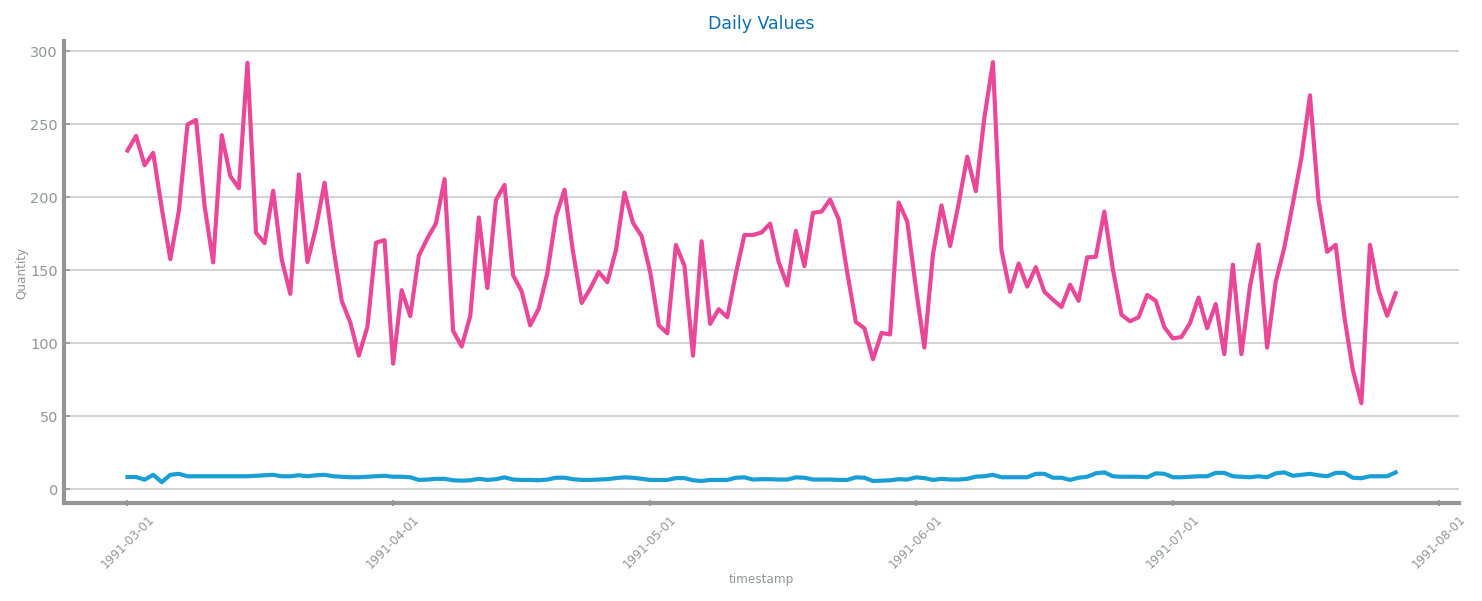

In [12]:
index = data.index.to_period('d')
week_df = data.copy().groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(week_df, title='Daily Values', x_label='timestamp', y_label='Quantity')
xticks(rotation = 45)

#plt.savefig('images/set_1_granularity_day.png')

### Boxplots

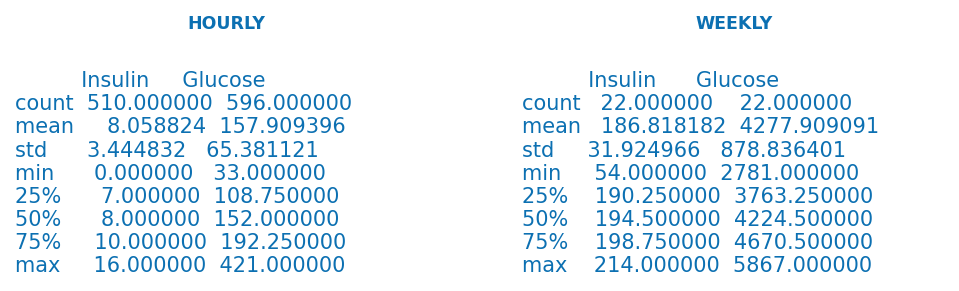

<AxesSubplot: >

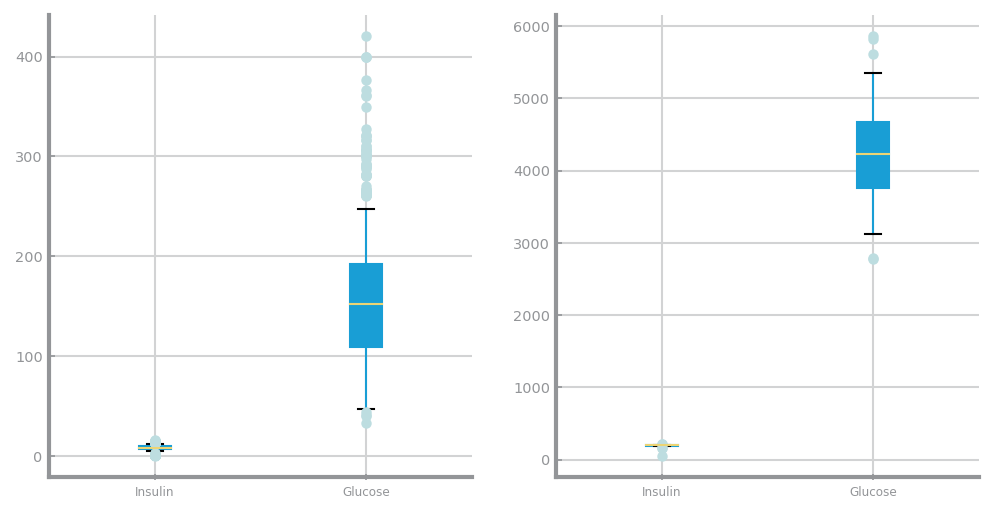

In [13]:
from matplotlib.pyplot import subplots

index = data.index.to_period('W')
week_df = data.copy().groupby(index).sum()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
_, axs = subplots(1, 2, figsize=(2*HEIGHT, HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('HOURLY', fontweight="bold")
axs[0].text(0, 0, str(data.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('WEEKLY', fontweight="bold")
axs[1].text(0, 0, str(week_df.describe()))
show()

_, axs = subplots(1, 2, figsize=(2*HEIGHT, HEIGHT))
data.boxplot(ax=axs[0])
week_df.boxplot(ax=axs[1])

Text(0.5, 1.0, 'Atomic Granularity Boxplot')

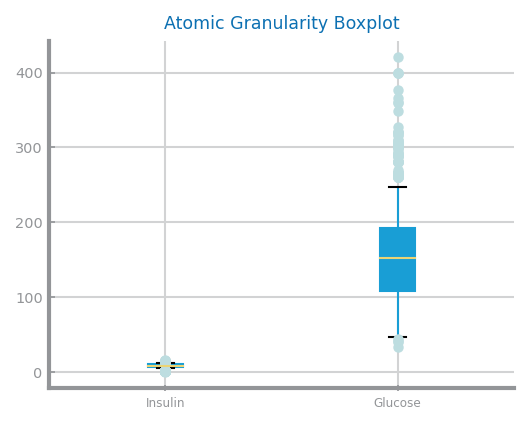

In [14]:
data.boxplot()
plt.title('Atomic Granularity Boxplot')

#plt.savefig('images/set_1_Boxplot_atomic.png')

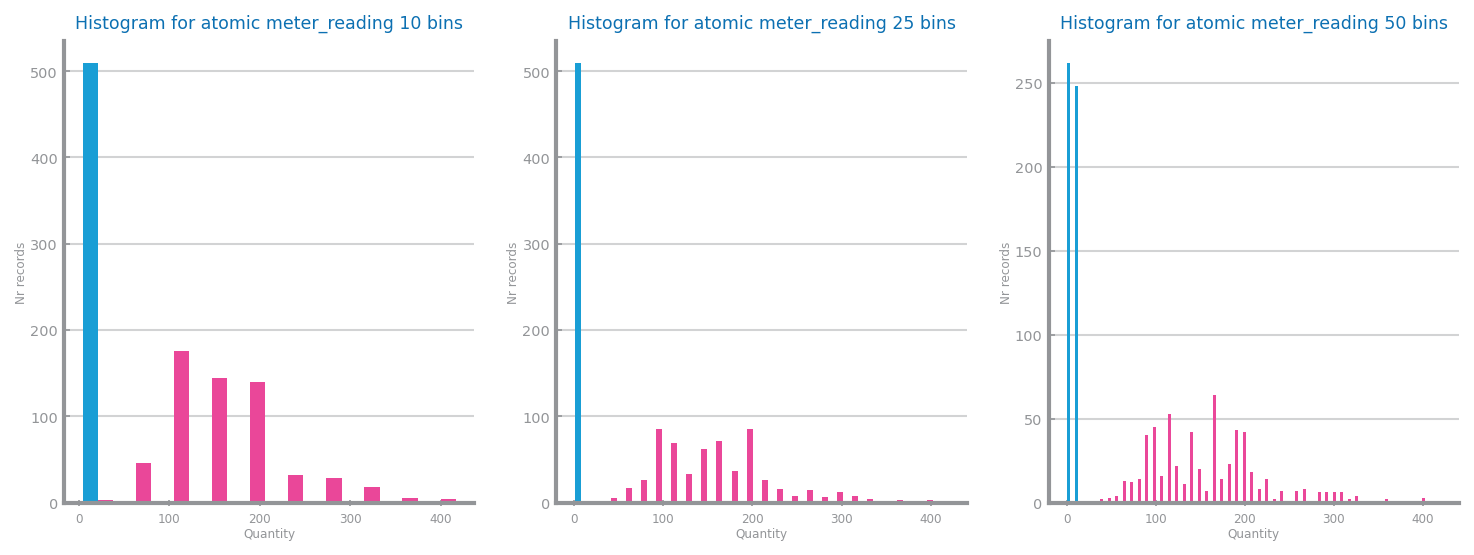

In [15]:
bins = (10, 25, 50)
_, axs = subplots(1, len(bins), figsize=(len(bins)*HEIGHT, HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for atomic meter_reading %d bins'%bins[j])
    axs[j].set_xlabel('Quantity')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data.values, bins=bins[j])
    
#plt.savefig('images/set_1_histogram_atomic.png')

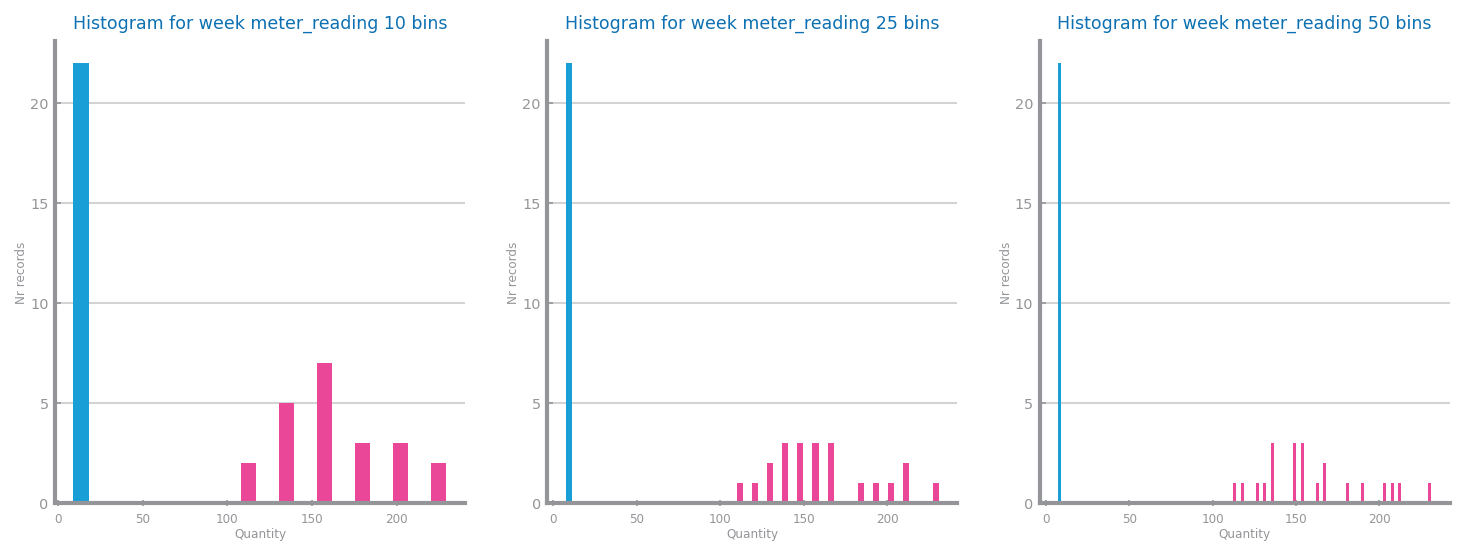

In [16]:
index = data.index.to_period('w')
week_df = data.copy().groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)

bins = (10, 25, 50)
_, axs = subplots(1, len(bins), figsize=(len(bins)*HEIGHT, HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for week meter_reading %d bins'%bins[j])
    axs[j].set_xlabel('Quantity')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(week_df, bins=bins[j])
    
#plt.savefig('images/set_1_histogram_week.png')

### Stationary Study

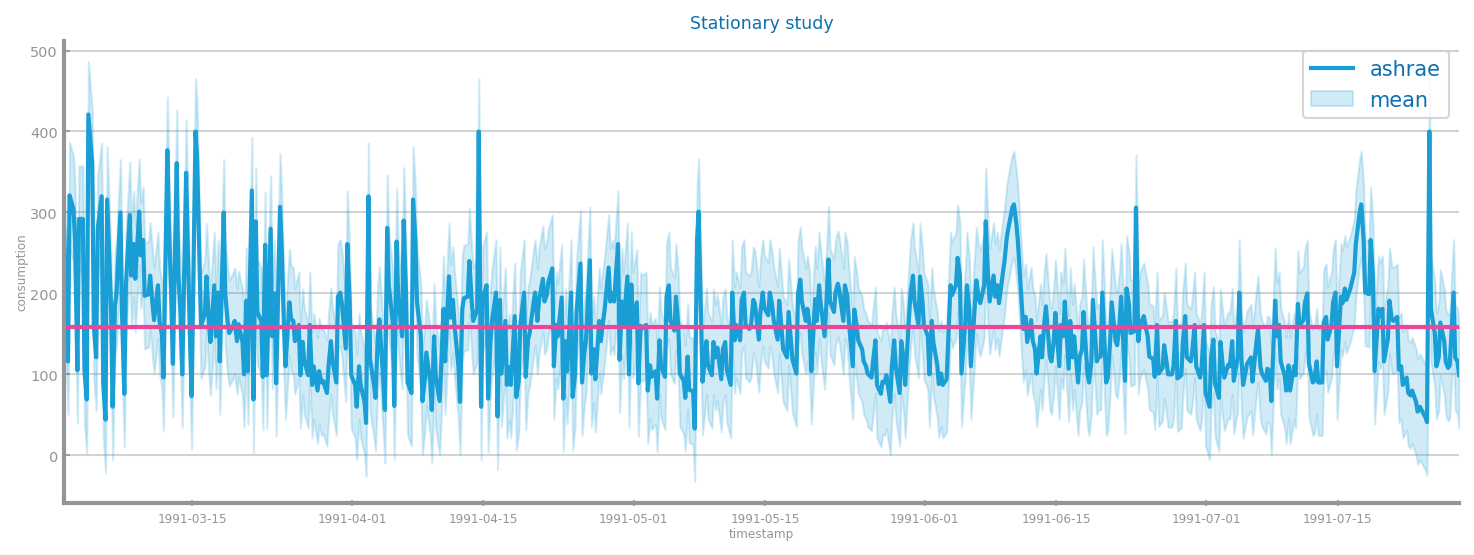

In [17]:
from numpy import ones
from pandas import Series

dt_series = Series(data['Glucose'])

mean_line = Series(ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)

series = {'ashrae': dt_series, 'mean': mean_line}
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='timestamp', y_label='consumption', title='Stationary study', show_std=True)
show()

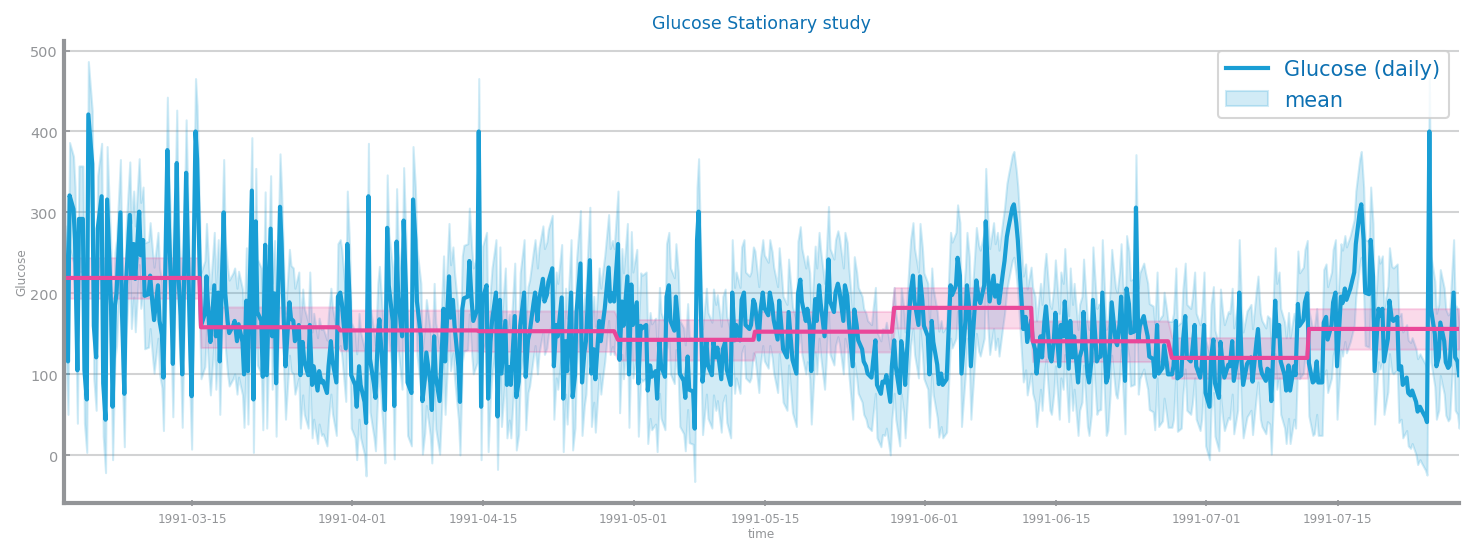

In [18]:
BINS = 10
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = Series(line, index=dt_series.index)
series = {'Glucose (daily)': dt_series, 'mean': mean_line}
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='time', y_label='Glucose', title='Glucose Stationary study', show_std=True)

#plt.savefig('images/set_1_stationary_study_glucose.png')

## Time Series Transformations

In [196]:
target='Glucose'

data = read_csv(data_path, index_col='Date', sep=',', decimal='.', parse_dates=False, infer_datetime_format=True)
data.index = pd.to_datetime(data.index, format="%d-%m-%Y %H:%M")

# Imputate Missing Values
mean_value=data['Insulin'].mean()
data['Insulin'].fillna(value=mean_value, inplace=True)

In [197]:
data_atomic=aggregate_by(data, 'timestamp', 'h')
data_grain_1=aggregate_by(data, 'timestamp', 'd')
data_grain_2=aggregate_by(data, 'timestamp', 'w')

#index=data.index.to_period('h')
#data_atomic=data.copy().groupby(index).mean()

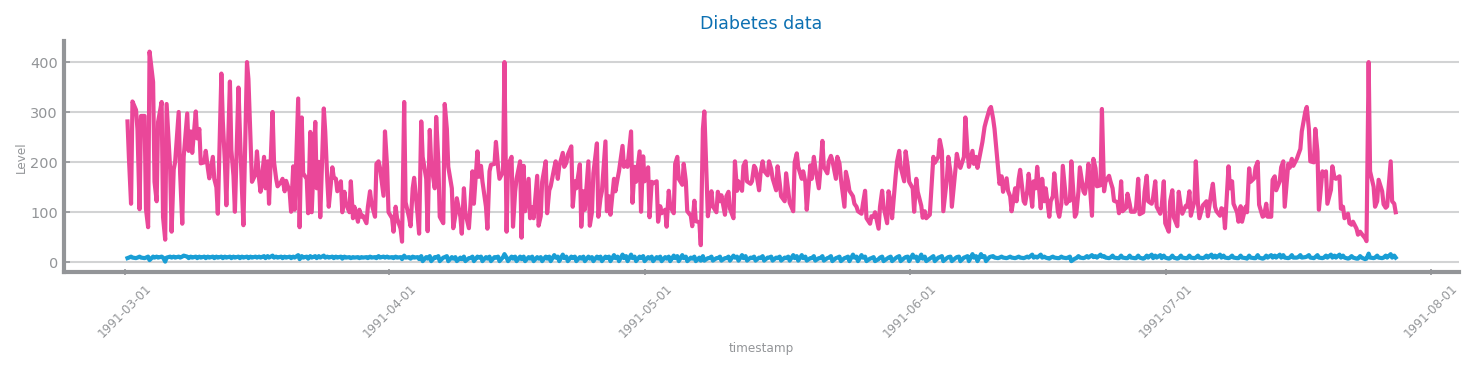

In [121]:
from pandas import read_csv, Series
from matplotlib.pyplot import figure, xticks, show
from ts_functions import plot_series, HEIGHT

figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(data, x_label='timestamp', y_label='Level', title='Diabetes data')
xticks(rotation = 45)
show()

### Aggregation

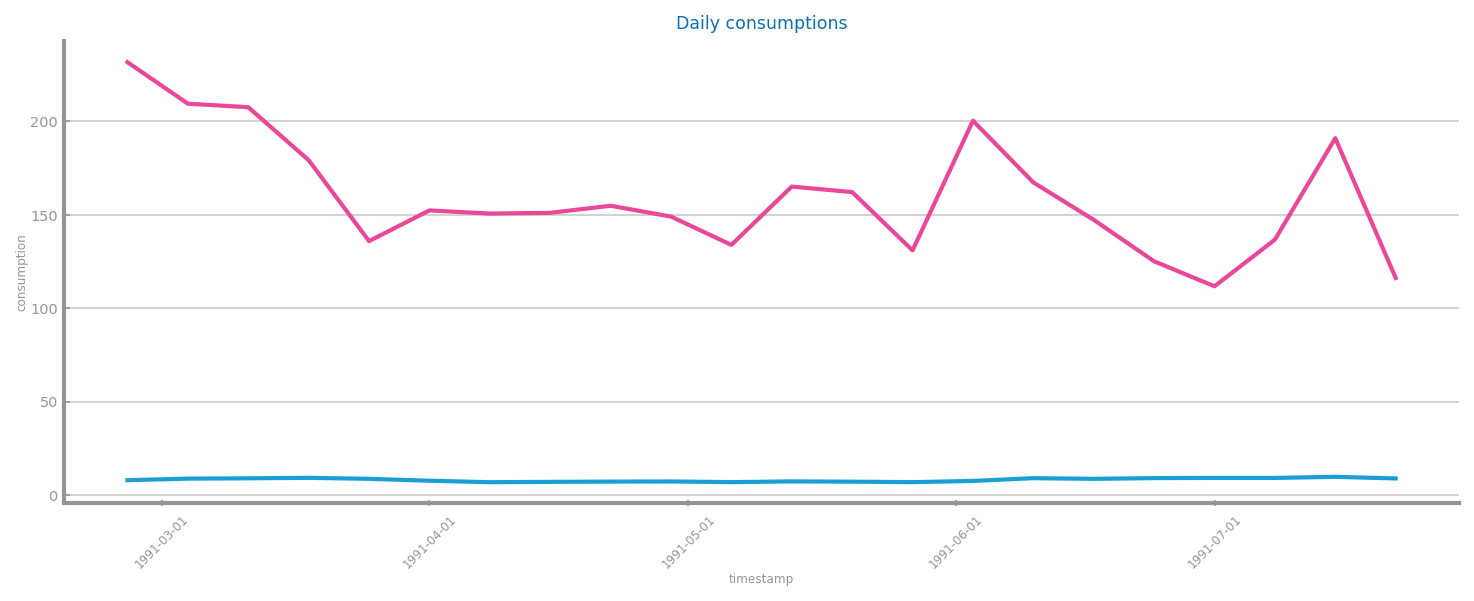

In [114]:
def aggregate_by(data: Series, index_var: str, period: str):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    return agg_df

figure(figsize=(3*HEIGHT, HEIGHT))
agg_df = aggregate_by(data, 'timestamp', 'w')
plot_series(agg_df, title='Daily consumptions', x_label='timestamp', y_label='consumption')
xticks(rotation = 45)

transformation='agg'

### Smoothing

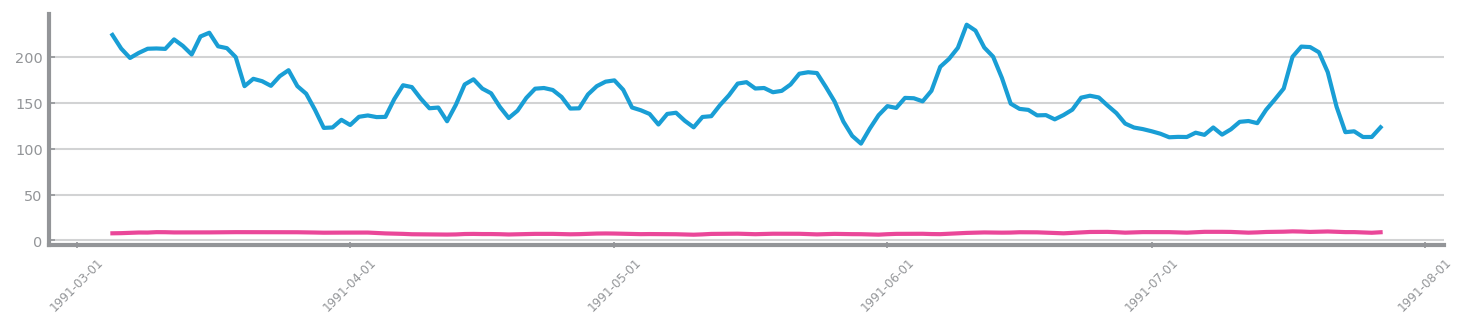

In [234]:
WIN_SIZES = [1, 5, 20]

WIN_SIZE = WIN_SIZES[1]

data_grain_1=aggregate_by(data, 'timestamp', 'd')

rolling_multi = data_grain_1.rolling(window=WIN_SIZE)
smooth_df_multi = rolling_multi.mean()
figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(smooth_df_multi[target], title=f'Appliances - Smoothing (win_size={WIN_SIZE})', x_label='Date', y_label='consumption')
plot_series(smooth_df_multi['Insulin'])
xticks(rotation = 45)

data_grain_1=smooth_df_multi
data_grain_1.dropna(inplace=True)

### Differentiation

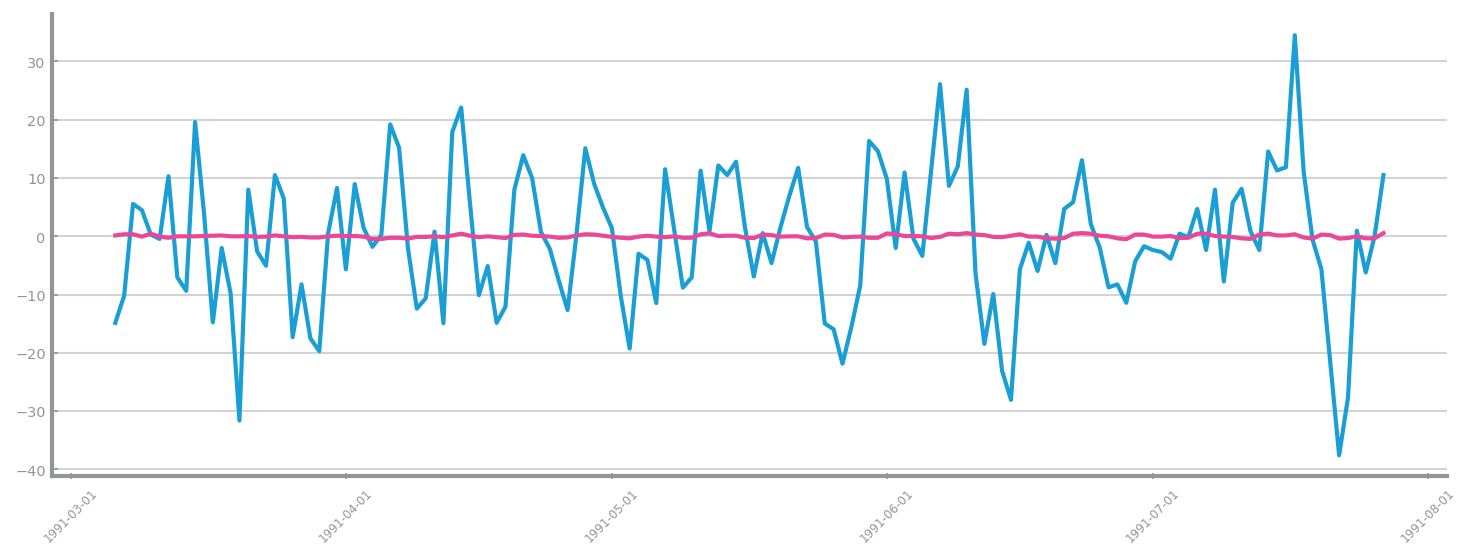

In [235]:
#data_grain_1=aggregate_by(data, 'timestamp', 'd')

diff_df_multi = data_grain_1.diff()

figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(diff_df_multi[target], title='1st Differentiation', x_label='Timestamp', y_label='consumption')
plot_series(diff_df_multi['Insulin'])
xticks(rotation = 45)

data_grain_1=diff_df_multi
data_grain_1.dropna(inplace=True)

(array([726892., 726923., 726953., 726984., 727014., 727045.]),
 [Text(726892.0, 0, '1991-03-01'),
  Text(726923.0, 0, '1991-04-01'),
  Text(726953.0, 0, '1991-05-01'),
  Text(726984.0, 0, '1991-06-01'),
  Text(727014.0, 0, '1991-07-01'),
  Text(727045.0, 0, '1991-08-01')])

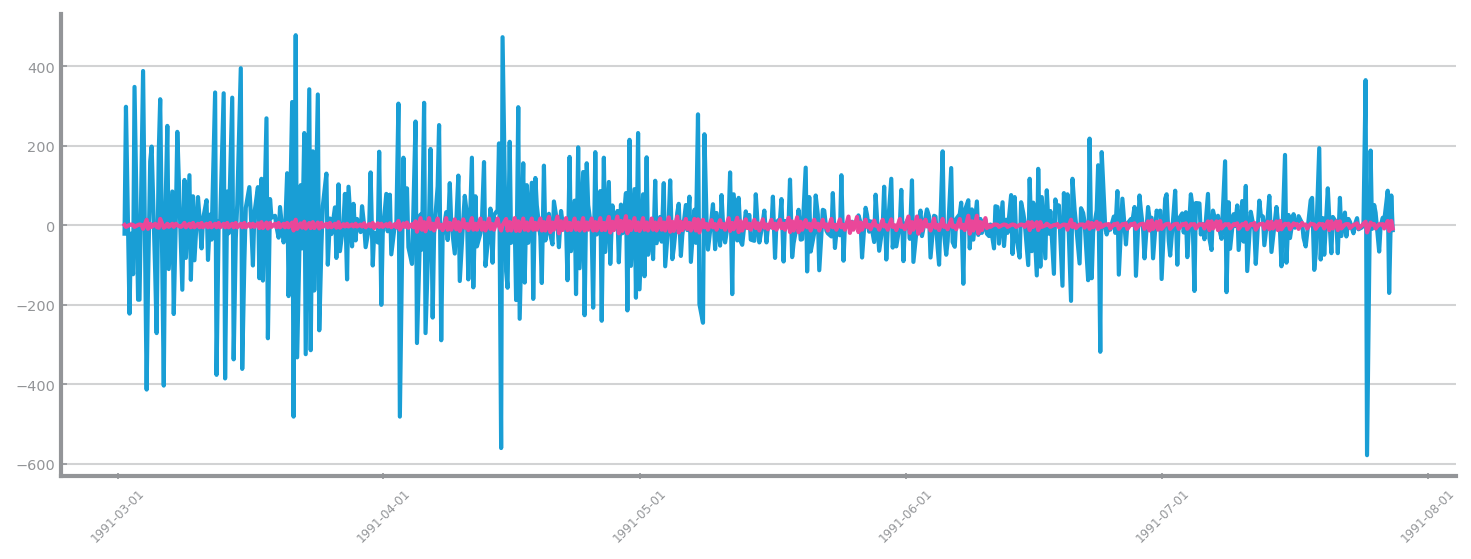

In [95]:
diff_diff_df_multi = diff_df_multi.diff()
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(diff_diff_df_multi[target], title='1st Differentiation', x_label='Timestamp', y_label='consumption')
plot_series(diff_diff_df_multi['Insulin'])
xticks(rotation = 45)

## Simple Average

#### Split Train & Test

In [226]:
def split_dataframe(data, trn_pct=0.70):
    trn_size = int(len(data) * trn_pct)
    df_cp = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size, :]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test


#CHANGE DATA FOR EACH GRANULARITY


train, test = split_dataframe(data_grain_1, trn_pct=0.75)

In [199]:
def plot_forecasting_series(trn, tst, prd_trn, prd_tst, figname: str, x_label: str = 'time', y_label:str =''):
    _, ax = subplots(1,1,figsize=(5*HEIGHT, HEIGHT), squeeze=True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(figname)
    ax.plot(trn.index, trn, label='train', color='b')
    ax.plot(trn.index, prd_trn, '--y', label='train prediction')
    ax.plot(tst.index, tst, label='test', color='g')
    ax.plot(tst.index, prd_tst, '--r', label='test prediction')
    ax.legend(prop={'size': 5})


measure = 'R2'
flag_pct = False
eval_results = {}

In [200]:
index_col='Date'

{'SimpleAvg': -8.891518422533656}
{'RMSE': [20.55072967734964, 28.14945336682635], 'MAE': [12.273226868872554, 19.3812003968254]} {'R2': [-1.1102230246251565e-16, -8.891518422533656]}


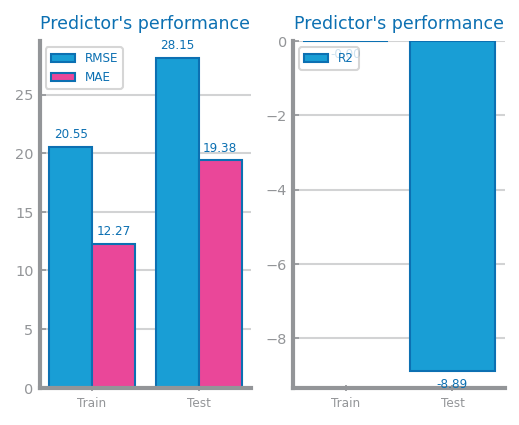

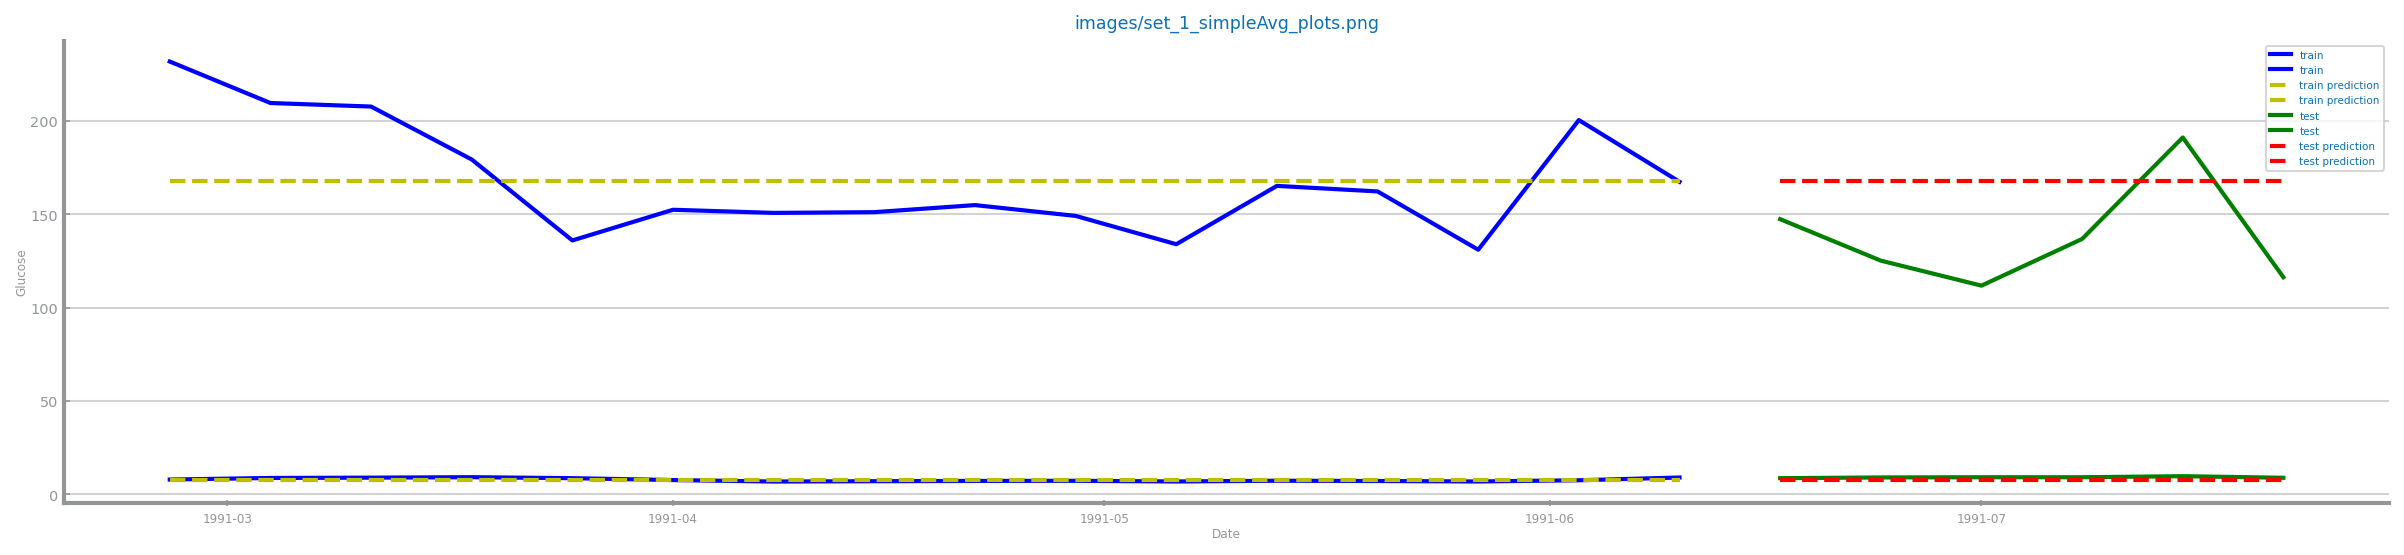

In [201]:
from sklearn.base import RegressorMixin
from ts_functions import PREDICTION_MEASURES, plot_evaluation_results, plot_forecasting_series
from pandas import DataFrame

class SimpleAvgRegressor (RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean = 0

    def fit(self, X: DataFrame):
        self.mean = X.mean()

    def predict(self, X: DataFrame):
        prd =  len(X) * [self.mean]
        return prd

fr_mod = SimpleAvgRegressor()
fr_mod.fit(train)
prd_trn = fr_mod.predict(train)
prd_tst = fr_mod.predict(test)

eval_results['SimpleAvg'] = PREDICTION_MEASURES[measure](test.values, prd_tst)
print(eval_results)

plot_evaluation_results(train.values, prd_trn, test.values, prd_tst, f'images/{file_tag}_simpleAvg_eval.png')
plot_forecasting_series(train, test, prd_trn, prd_tst, f'images/{file_tag}_simpleAvg_plots.png', x_label=index_col, y_label=target)

## Persistance Model

-0.3000000000000007
{'SimpleAvg': -8.891518422533656, 'Persistence': -0.11687850082807966}
{'RMSE': [8.979566665651715, 7.628864219281918], 'MAE': [5.22687908496732, 4.278472222222224]} {'R2': [-0.17468017858931517, -0.11687850082807966]}


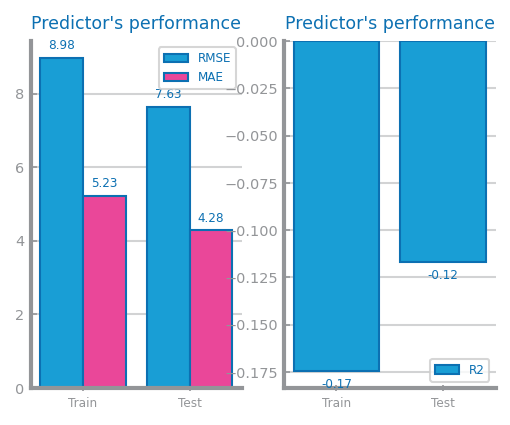

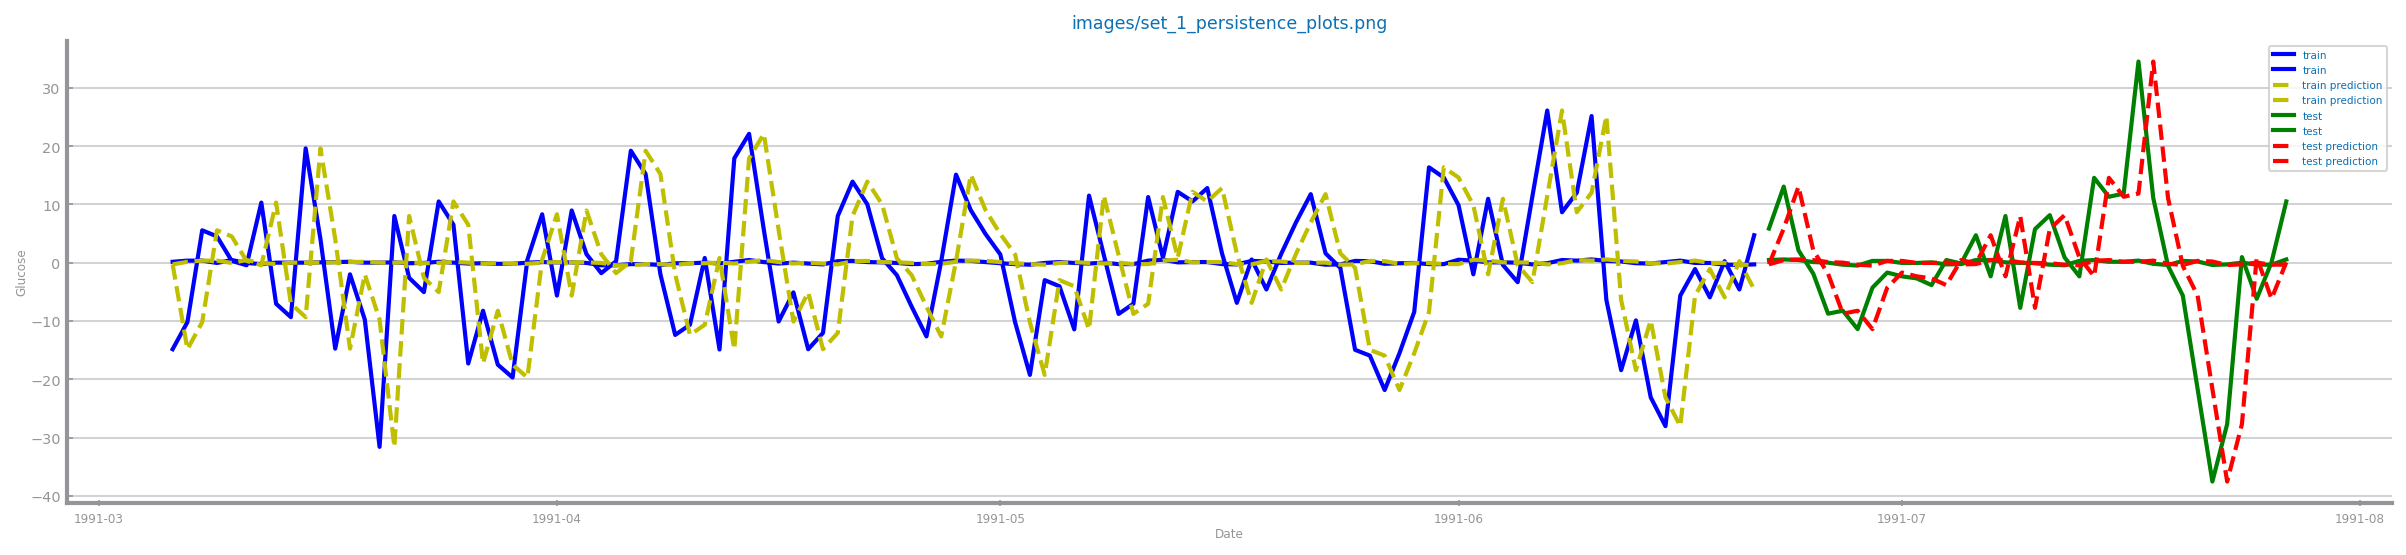

In [236]:
class PersistenceRegressor (RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last = 0

    def fit(self, X: DataFrame):
        self.last = X.iloc[-1,0]
        print(self.last)

    def predict(self, X: DataFrame):
        prd = X.shift().values
        prd[0] = self.last
        return prd

def split_dataframe(data, trn_pct=0.70):
    trn_size = int(len(data) * trn_pct)
    df_cp = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size, :]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test

train, test = split_dataframe(data_grain_1, trn_pct=0.75)

fr_mod = PersistenceRegressor()
fr_mod.fit(train)
prd_trn = fr_mod.predict(train)
prd_tst = fr_mod.predict(test)

eval_results['Persistence'] = PREDICTION_MEASURES[measure](test.values, prd_tst)
print(eval_results)

plot_evaluation_results(train.values, prd_trn, test.values, prd_tst, f'images/{file_tag}_persistence_eval.png')

plt.savefig('images/set_1_differentiating_2_results.png')

plot_forecasting_series(train, test, prd_trn, prd_tst, f'images/{file_tag}_persistence_plots.png', x_label=index_col, y_label=target)

plt.savefig('images/set_1_differentiating_2_plot.png')

In [167]:
!open .